In [256]:
import netCDF4 as nc4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

In [283]:
hansen_ds = xr.open_dataarray("hansen_ds.nc")
mean_dom_grass = xr.open_dataarray("mean_dom_grass.nc")
sim_2000 = xr.open_dataarray("sim_2000.nc")

sim_2000_test = xr.open_dataarray("sim_2000_test.nc")


# Open the climate simulation data file
datapath='/home/disk/eos18/aswann/Macrosystems_ecoclimtel_test/CLM_transient_land_use/landuse.timeseries_0.9x1.25_hist_78pfts_CMIP6_simyr1850-2015_c170824.nc'
ds = xr.open_dataset(datapath)
PCT_NAT_PFT = ds.PCT_NAT_PFT




In [284]:
#Climate file stats
# Year 200 = PCT_NAT_PFT[150,0,0,0]

PCT_NAT_PFT.shape


(166, 15, 192, 288)

In [278]:
# Create binary of locations where there is forest loss at any year

print(hansen_ds.shape)
forest_loss_binary = hansen_ds[:,:, 0]
print(forest_loss_binary.shape)



for i in np.arange(0,192):
    for j in np.arange(0,288):
        if hansen_ds[i,j,:].sum() > 0:
            forest_loss_binary[i,j] = 1
        else:
                forest_loss_binary[i,j] = 0     

(192, 288, 16)
(192, 288)


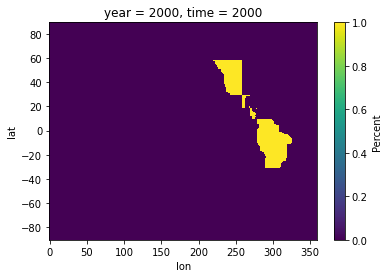

In [279]:
forest_loss_binary.plot()

In [280]:
where_forest_loss = np.where(forest_loss_binary > 0)

In [281]:
print(len(where_forest_loss[0]))
print(where_forest_loss[1].shape)


1847
(1847,)


In [298]:
def forest_loss_applied_by_year(previous_year_file, year):
      
    # Set entire new file to the corresponding model files for that year
    year_index_model = int(year - 1850)
    new_year = PCT_NAT_PFT[year_index_model, :, :, :]
    
    # Loop through the list of coordinates where forest loss ever occured
    for i in np.arange(len(where_forest_loss[0])): 
        lat = where_forest_loss[0][i]
        lon = where_forest_loss[1][i]
         
        # Set everywhere with Hansen forest loss to previous year's file
        # Makes this region unaffected in anyway by the climate model file
        new_year[:,lat,lon] = previous_year_file[:, lat, lon]
        
        # Finds hansen forest loss amount, if nan --> 0 
        year_index_forest_loss = int(year - 2000) # Selects specfic year of forest loss
        forest_loss = hansen_ds[lat,lon, year_index_forest_loss] 
        

        tree_loss_total = 0  # Count total tree loss in a single box
        
        for k in [1,2,3,4,5,6,7,8]: #loop though tree numbers -- k
            tree_value = previous_year_file[k,lat,lon] # Gets old tree value from similation input data
            new_tree_value = tree_value * (1-forest_loss) # Creates new tree value that accounts for fraction of tree loss
            loss = tree_value - new_tree_value # Calculates tree loss amount for tree type in the box
            tree_loss_total = tree_loss_total + loss # Aggreagates loss across PFTs (trees)
            new_year[k,lat,lon] = new_tree_value # Assigns new tree value in the manipulated file

        grass_type = mean_dom_grass[lat,lon].values
        tree_loss_total = tree_loss_total.values
        #print(tree_loss_total)
        old_grass = previous_year_file[int(grass_type),lat,lon]
        new_year[int(grass_type),lat,lon] = old_grass + tree_loss_total     

    
    new_year.to_netcdf("forest_loss_applied_" + str(year) +  ".nc")  
    print("Year " + str(year) + " Done!")
    print()
    
    return new_year
    



In [299]:
# Reopen all needed files to call funtion

hansen_ds = xr.open_dataarray("hansen_ds.nc")
hansen_ds = np.nan_to_num(hansen_ds)
mean_dom_grass = xr.open_dataarray("mean_dom_grass.nc")
sim_2000 = xr.open_dataarray("sim_2000.nc")


# Open the climate simulation data file
datapath='/home/disk/eos18/aswann/Macrosystems_ecoclimtel_test/CLM_transient_land_use/landuse.timeseries_0.9x1.25_hist_78pfts_CMIP6_simyr1850-2015_c170824.nc'
ds = xr.open_dataset(datapath)
PCT_NAT_PFT = ds.PCT_NAT_PFT




In [291]:
forest_loss_applied_2000 = forest_loss_applied_by_year(sim_2000, 2000)


Year 2000 Done!



In [302]:
year_2000 = xr.open_dataarray("forest_loss_applied_2000.nc")
year_2000.shape

(15, 192, 288)

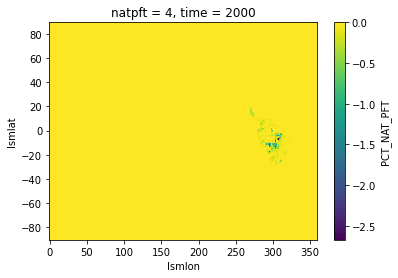

In [303]:
(year_2000[4,:,:]- sim_2000[4,:,:]).plot()

In [301]:
forest_loss_applied_2000 = forest_loss_applied_by_year(sim_2000, 2000)
forest_loss_applied_2001 = forest_loss_applied_by_year(forest_loss_applied_2000, 2001)
forest_loss_applied_2002 = forest_loss_applied_by_year(forest_loss_applied_2001, 2002)
forest_loss_applied_2003 = forest_loss_applied_by_year(forest_loss_applied_2002, 2003)
forest_loss_applied_2004 = forest_loss_applied_by_year(forest_loss_applied_2003, 2004)
forest_loss_applied_2005 = forest_loss_applied_by_year(forest_loss_applied_2004, 2005)
forest_loss_applied_2006 = forest_loss_applied_by_year(forest_loss_applied_2005, 2006)
forest_loss_applied_2007 = forest_loss_applied_by_year(forest_loss_applied_2006, 2007)
forest_loss_applied_2008 = forest_loss_applied_by_year(forest_loss_applied_2007, 2008)
forest_loss_applied_2009 = forest_loss_applied_by_year(forest_loss_applied_2008, 2009)
forest_loss_applied_2010 = forest_loss_applied_by_year(forest_loss_applied_2009, 2010)
forest_loss_applied_2011 = forest_loss_applied_by_year(forest_loss_applied_2010, 2011)
forest_loss_applied_2012 = forest_loss_applied_by_year(forest_loss_applied_2011, 2012)
forest_loss_applied_2013 = forest_loss_applied_by_year(forest_loss_applied_2012, 2013)
forest_loss_applied_2014 = forest_loss_applied_by_year(forest_loss_applied_2013, 2014)
forest_loss_applied_2015 = forest_loss_applied_by_year(forest_loss_applied_2014, 2015)


Year 2000 Done!

Year 2001 Done!

Year 2002 Done!

Year 2003 Done!

Year 2004 Done!

Year 2005 Done!

Year 2006 Done!

Year 2007 Done!

Year 2008 Done!

Year 2009 Done!

Year 2010 Done!

Year 2011 Done!

Year 2012 Done!

Year 2013 Done!

Year 2014 Done!

Year 2015 Done!



In [304]:
year_2000 = xr.open_dataarray("forest_loss_applied_2000.nc")
year_2001 = xr.open_dataarray("forest_loss_applied_2001.nc")
year_2002 = xr.open_dataarray("forest_loss_applied_2002.nc")
year_2003 = xr.open_dataarray("forest_loss_applied_2003.nc")
year_2004 = xr.open_dataarray("forest_loss_applied_2004.nc")
year_2005 = xr.open_dataarray("forest_loss_applied_2005.nc")
year_2006 = xr.open_dataarray("forest_loss_applied_2006.nc")
year_2007 = xr.open_dataarray("forest_loss_applied_2007.nc")
year_2008 = xr.open_dataarray("forest_loss_applied_2008.nc")
year_2009 = xr.open_dataarray("forest_loss_applied_2009.nc")
year_2010 = xr.open_dataarray("forest_loss_applied_2010.nc")


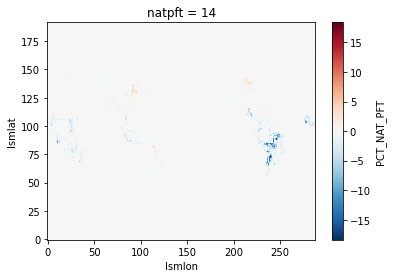

In [316]:
(year_2000[14,:,:]- year_2010[14,:,:]).plot()

# plot the change in hansen next to it 
# change in sum of trees

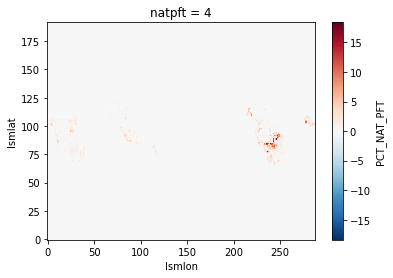

In [318]:
(year_2000[4,:,:]- year_2010[4,:,:]).plot()

In [127]:
# Practice function with small amount of space
# Can change to whole world


# 11/23 Problem, how to hold onto that has been effected by trees 
#       Ideas: get a binary of all places trees get lost in any year in tree loss file, and reference that.
#             Update everything else with each year of climate file 
# Loop through only binary 



def forest_loss_applied_by_year(previous_year_file, year, climate_file):
    
    # Set new file to the corresponding climate value
    year_index_climate = int(year - 1850)
    new_year = climate_file[year_index_climate, :, :, :]
    
    
    for i in np.arange(0,192):
        for j in np.arange(0,288): 
           
            year_index_forest_loss = int(year - 2000) # Selects specfic year of forest loss

            forest_loss = hansen_ds[i,j, year_index_forest_loss] # need something that says if NAN, is 0

            if forest_loss > 0:  # NEED TO change to "If Forest loss in all years is NOT NAN"
                tree_loss_total = 0  # Count total tree loss in a single box
                for k in [1,2,3,4,5,6,7,8]: #loop though plant numbers -- k
                    tree_value = previous_year_file[k,i,j] # Gets old tree value from similation input data
                    new_tree_value = tree_value * (1-forest_loss) # Creates new tree value that accounts for fraction of tree loss
                    loss = tree_value - new_tree_value # Calculates tree loss amount for tree type in the box
                    tree_loss_total = tree_loss_total + loss # Aggreagates loss across PFTs (trees)
                    new_year[k,i,j] = new_tree_value # Assigns new tree value in the manipulated file

                grass_type = mean_dom_grass[i,j].values
                #print(grass_type)
                tree_loss_total = tree_loss_total.values
                #print(tree_loss_total)
                old_grass = previous_year_file[int(grass_type),i,j]
                new_year[int(grass_type),i,j] = old_grass + tree_loss_total 
   

    new_year.to_netcdf("forest_loss_applied_" + str(year) +  ".nc")  
    print("Year " + str(year) + " Done!")
    print()

    return new_year

In [130]:
#test = forest_loss_applied_by_year(sim_2000, 2000)


NameError: name 'NaN' is not defined

In [97]:
'''
print(test[1,150,200].values)
print(sim_2000_test[1,150,200].values)

print(test[13,150,200].values)
print(sim_2000_test[13,150,200].values)


print(test[1,150,200].values+test[13,150,200].values+test[7,150,200].values)
print(sim_2000_test[1,150,200].values+sim_2000_test[13,150,200].values+sim_2000_test[7,150,200].values)

'''

0.6926783184434562
0.6926783184434562
98.02642653212716
98.02642653212716
99.78471706966218
99.78471706966218


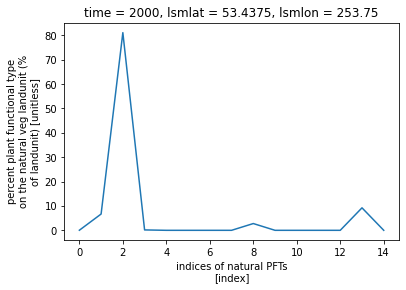

In [105]:
forest_loss_applied_2015[:,153,203].plot()

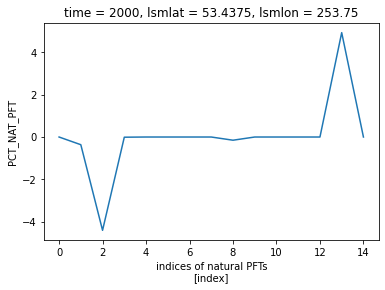

In [115]:
(forest_loss_applied_2015[:,153,203]- forest_loss_applied_2000[:,153,203]).plot()

In [ ]:
# FUNCTION BEFORE CHANGES ON 11/24



# Practice function with small amount of space
# Can change to whole world

def forest_loss_applied_by_year(previous_year_file, year, climate_file):
    
    new_
    
    
    new_year = previous_year_file[:,:,:]
    for i in np.arange(0,192):
        for j in np.arange(0,288): 
           
            year_index = int(year - 2000)
            # Selects specfic year of forest loss
            forest_loss = hansen_ds[i,j, year_index] # need something that says if NAN, is 0
            # Count total tree loss in a single box

            if forest_loss > 0: 
                
                tree_loss_total = 0 
                #loop though plant numbers -- k
                for k in [1,2,3,4,5,6,7,8]: 
                    tree_value = previous_year_file[k,i,j] # Gets old tree value from similation input data
                    new_tree_value = tree_value * (1-forest_loss) # Creates new tree value that accounts for fraction of tree loss
                    loss = tree_value - new_tree_value # Calculates tree loss amount for tree type in the box
                    tree_loss_total = tree_loss_total + loss # Aggreagates loss across PFTs (trees)
                    new_year[k,i,j] = new_tree_value # Assigns new tree value in the manipulated file

                grass_type = mean_dom_grass[i,j].values
                #print(grass_type)
                tree_loss_total = tree_loss_total.values
                #print(tree_loss_total)
                old_grass = previous_year_file[int(grass_type),i,j]
                new_year[int(grass_type),i,j] = old_grass + tree_loss_total 
   

    new_year.to_netcdf("forest_loss_applied_" + str(year) +  ".nc")  
    print("Year " + str(year) + " Done!")
    print()

    return new_year